In [36]:
suppressPackageStartupMessages(library(tidyverse))
df <- readr::read_csv('data/sales_data.csv', show_col_types = FALSE)
head(df)

date,warehouse,client_type,product_line,quantity,unit_price,total,payment
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer


# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data
The team assembled the following file:

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [37]:
head(df)

date,warehouse,client_type,product_line,quantity,unit_price,total,payment
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.Rmd.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# What are the total sales for each payment method?

In [38]:
df %>%
	group_by(payment) %>%
	summarize(total_sale = round(sum(total),2)) %>%
	arrange(total_sale)

payment,total_sale
<chr>,<dbl>
Cash,19199.1
Credit card,110271.6
Transfer,159642.3


# What is the average unit price for each product line?

In [39]:
df %>%
	group_by(product_line) %>%
	summarise(avg_unit_price = round(mean(unit_price), 2)) %>%
	arrange(avg_unit_price)

product_line,avg_unit_price
<chr>,<dbl>
Breaking system,17.74
Miscellaneous,22.81
Electrical system,25.59
Suspension & traction,33.97
Frame & body,42.83
Engine,60.09


# Optional Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)

In [40]:
#Average purchase value by client type

df %>%
	group_by(client_type) %>%
	summarise(avg_purchase_value = mean(total))

client_type,avg_purchase_value
<chr>,<dbl>
Retail,167.0589
Wholesale,709.5215


In [41]:
#Total purchase value by product line

df %>%
	group_by(product_line) %>%
	summarise(total_purchase_value = sum(total)) %>%
	arrange(total_purchase_value)

product_line,total_purchase_value
<chr>,<dbl>
Miscellaneous,27165.82
Engine,37945.38
Breaking system,38350.15
Electrical system,43612.71
Frame & body,69024.73
Suspension & traction,73014.21


# Summary of Findings

When it came to our past performance with our motorcycle part sales, here are the findings that you requested along with additional findings to help better understand our clients, what products from our product line performed the best, and our total sales.

## Total Sales for each payment method

Our three payment methods our clients use are cash, credit card, and transfer. We have received transfer payments the most compared to credit card and cash payments combined.

- Cash : $19,199
- Credit Card: $110,271
- Transfer: $159,642

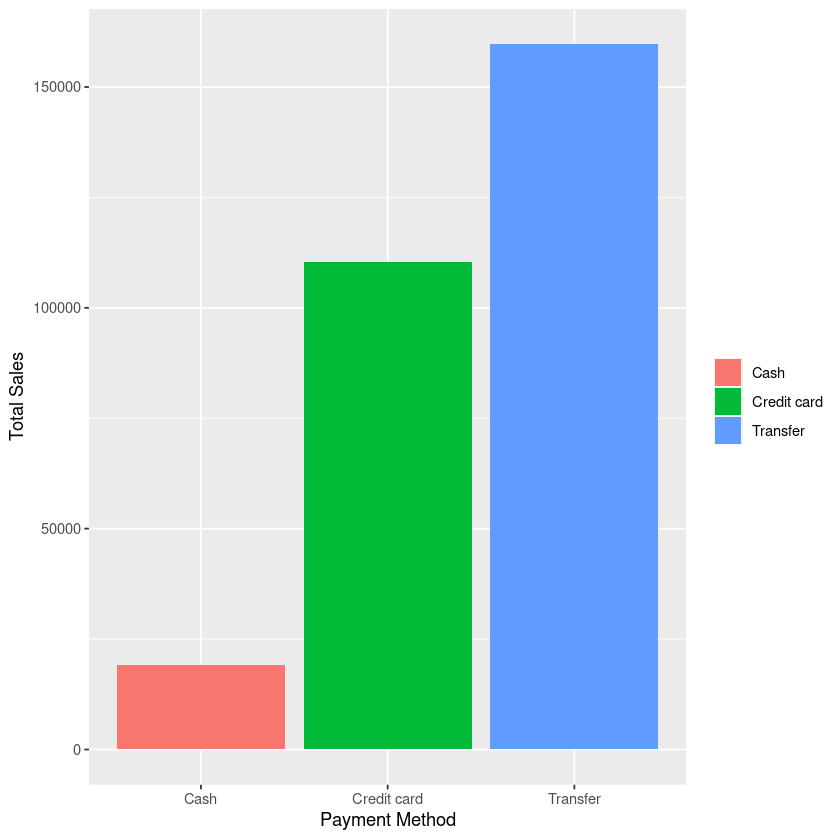

In [51]:
df %>%
  group_by(payment) %>%
  summarize(total_sale = sum(total)) %>%
  ggplot(aes(payment, total_sale, fill = payment)) +
  geom_col() +
  xlab("Payment Method") +
  ylab("Total Sales") +
  guides(fill = guide_legend(title = NULL))

## Average Unit Price For Each Product Line

When it comes to our average unit price for each of our product lines, our engine, frame & body, and suspension & traction have the highest average unit price. Our lowest average unit price product that we sell is our braking system parts.

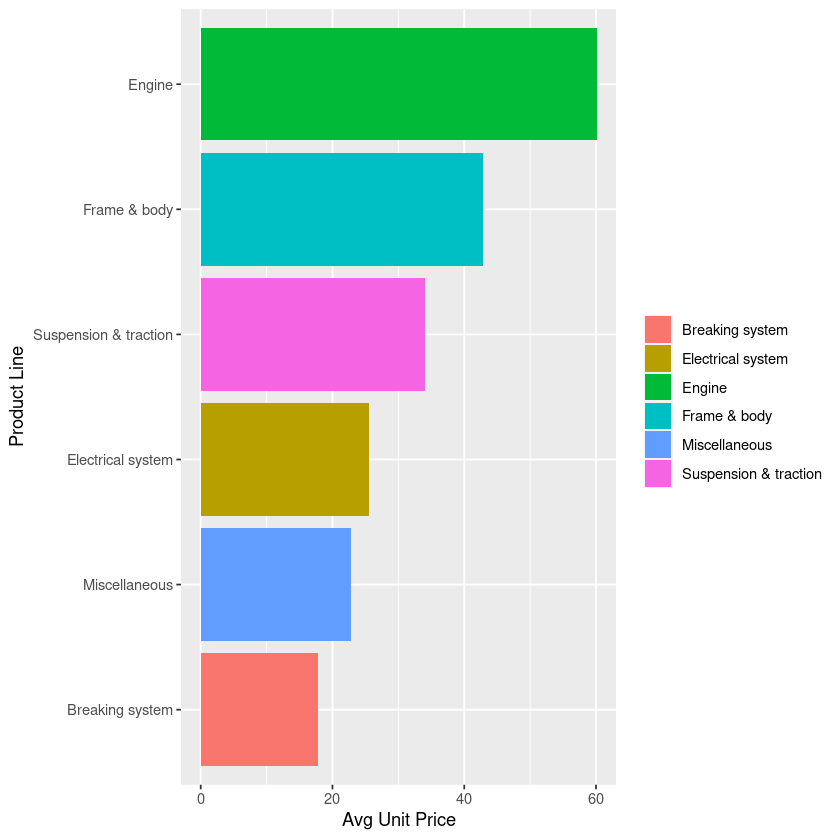

In [52]:
df %>%
	group_by(product_line) %>%
	summarise(avg_unit_price = round(mean(unit_price), 2)) %>%
	ggplot(aes(avg_unit_price, fct_reorder(product_line, avg_unit_price), fill = product_line))+
	geom_col()+
	xlab("Avg Unit Price") +
	ylab("Product Line") +
	guides(fill = guide_legend(title = NULL))

## Total Purchase Value by Product Line

Looking at the total purchase value for each of our product lines, our best performing product line has been suspension & traction followed by frame & body generating the most revenue.

While the average unit price for engine may be the highest, the total value we have generated from engines does not generate the most revenue for our company.

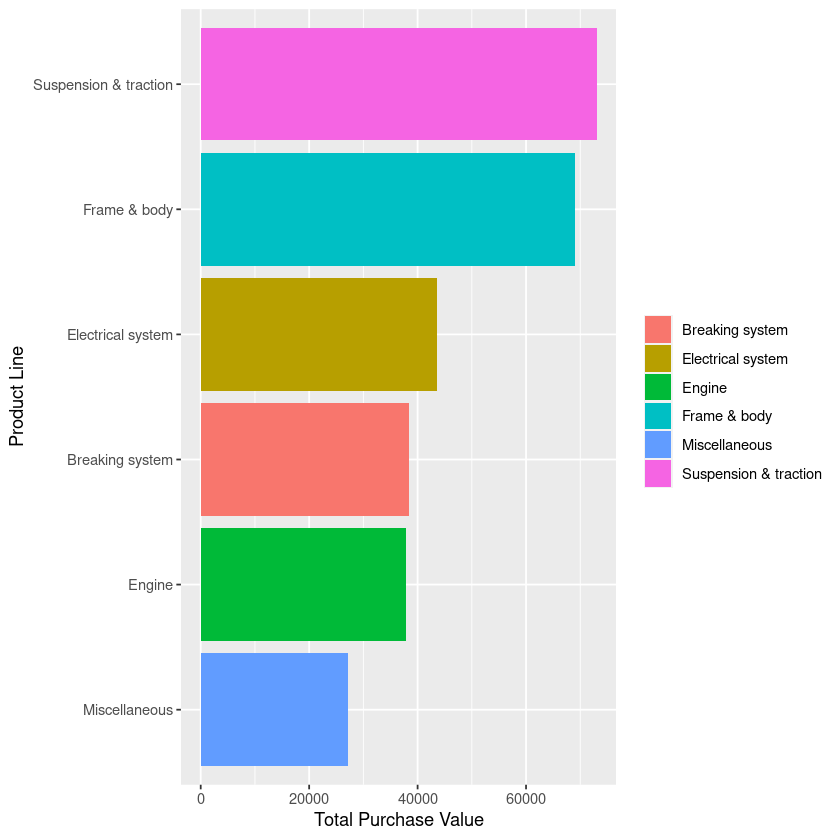

In [53]:
df %>%
	group_by(product_line) %>%
	summarise(total_purchase_value = sum(total)) %>%
	arrange(total_purchase_value) %>%
	ggplot(aes(total_purchase_value, fct_reorder(product_line, total_purchase_value), fill = product_line))+
	geom_col()+
	xlab("Total Purchase Value") +
	ylab("Product Line") +
	guides(fill = guide_legend(title = NULL))

## Average Unit Price by Client

When it comes to how much our clients spend on average for motorcycle parts, our wholesale clients purchase more from us on average compared to our retail clients.

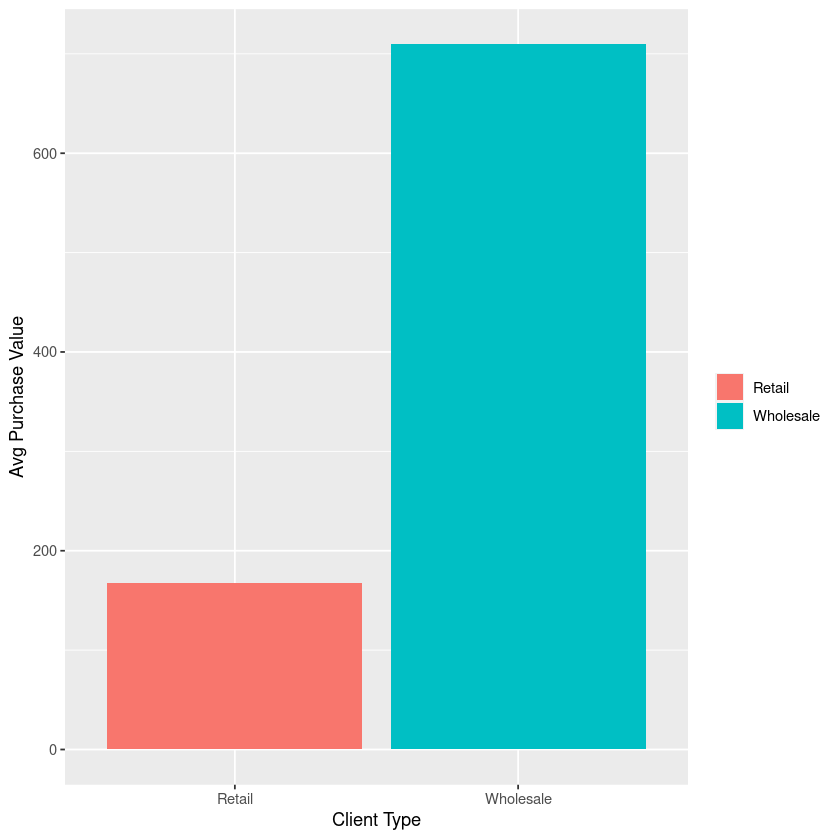

In [54]:
#Average Unit Price by Client

df %>%
	group_by(client_type) %>%
	summarise(avg_purchase_value = mean(total)) %>%
	ggplot(aes(client_type, avg_purchase_value, fill = client_type))+
	geom_col()+
	xlab("Client Type") +
	ylab("Avg Purchase Value") +
	guides(fill = guide_legend(title = NULL))